<a href="https://colab.research.google.com/github/jiil1/AI4DL/blob/main/chapter04_getting_started_with_neural_networks_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
imdb.load_data?
# goal : review -> pos/neg (binary classification)

Object `imdb.load_data` not found.


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
max(train_data[0])

7486

In [ ]:
train_labels[0]

1

In [ ]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
# list comprehension
[i*3 for i in range(3)] # range = (0, 1, 2)

[0, 3, 6]

In [ ]:
[i*2 if (i*3 > 5) else 0 for i in range(3)]

[0, 0, 4]

In [ ]:
[i*2 for i in range(3) if (i*3 > 5)]

[4]

In [ ]:
max([max(sequence) for sequence in train_data]) # since data -> num_word = 10000, so natural

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index() # dict mapping words -> integer index (ex. ['good' : 3])
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # reverse -> integer to words
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # decode with word_index & reverse_word_index
# i-3 <- indices are offset by 3 in IMDB dataset - (0, 1, 2) <-> reversed indices for (padding, start of sequence, unknown)

In [ ]:
#imdb.get_word_index?

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
[reverse_word_index.get(i-3, "?") for i in train_data[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [ ]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [ ]:
reverse_word_index.get(1-3, "?")

'?'

In [ ]:
reverse_word_index.get(14-3, "?")

'this'

In [ ]:
reverse_word_index.get(52-3, "?")

'good'

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
len(train_data[0])

218

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) # 빈 상자 준비: create all-zero matrix of shape <- fix size/len for all samples
    # (len(seq), dim) -> 25000(#samples) * 10000(#total words)
    for i, sequence in enumerate(sequences): # 문장 색인 세기: enumerates(counts) i, seq (ex. i=0(0th seq), [this movie so good = 5, 1, 4, 100])
        for j in sequence: # 문장의 단어 색인 세기: j iterates through seq (ex. [this movie so good = 5, 1, 4, 100])
            results[i, j] = 1. # 문장의 단어 표시: 1 <- position for each words
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32") # int -> float
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), # relu: max(0, x) -> input layer
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # sigmoid: (-inf, +inf) -> [0, 1) = (neg, pos) (binomial) -> output layer
])

In [ ]:
# three hidden layers
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# one hidden layer
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# activation=tanh
model3 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"), # tf.keras.activations.tang
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
# Keras API
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# loss=mse
import tensorflow as tf
model3.compile(optimizer="rmsprop",
              loss=tf.keras.losses.MeanSquaredError(), # "mean_squared_error"
              metrics=["accuracy"])

In [ ]:
# <=>
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])

### Validating your approach

**Setting aside a validation set**

In [ ]:
# Split dataset
# x
x_val = x_train[:10000] # first 10000
partial_x_train = x_train[10000:] # rest (skip 10000)

# y, label
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 57ms/step - loss: 0.4978 - accuracy: 0.7941 - val_loss: 0.3634 - val_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2966 - accuracy: 0.8977 - val_loss: 0.2990 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2207 - accuracy: 0.9268 - val_loss: 0.2825 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1789 - accuracy: 0.9407 - val_loss: 0.2765 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1505 - accuracy: 0.9496 - val_loss: 0.2963 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1236 - accuracy: 0.9620 - val_loss: 0.2922 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1063 - accuracy: 0.9687 - val_loss: 0.3247 - val_accuracy: 0.8803
Epoch 8/20
30

In [ ]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5468 - accuracy: 0.7771 - val_loss: 0.4324 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3543 - accuracy: 0.8865 - val_loss: 0.3406 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2666 - accuracy: 0.9115 - val_loss: 0.2952 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2158 - accuracy: 0.9279 - val_loss: 0.2780 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1818 - accuracy: 0.9391 - val_loss: 0.2735 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1534 - accuracy: 0.9499 - val_loss: 0.2947 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1347 - accuracy: 0.9567 - val_loss: 0.2905 - val_accuracy: 0.8841
Epoch 8/20
30

In [ ]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6011 - accuracy: 0.6925 - val_loss: 0.5117 - val_accuracy: 0.8438
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4266 - accuracy: 0.8715 - val_loss: 0.3836 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2844 - accuracy: 0.9166 - val_loss: 0.3151 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2054 - accuracy: 0.9334 - val_loss: 0.3402 - val_accuracy: 0.8667
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1638 - accuracy: 0.9479 - val_loss: 0.3016 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1432 - accuracy: 0.9523 - val_loss: 0.3071 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1092 - accuracy: 0.9692 - val_loss: 0.3242 - val_accuracy: 0.8800
Epoch 8/20
30

In [ ]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 40ms/step - loss: 0.0629 - accuracy: 0.9499 - val_loss: 0.0298 - val_accuracy: 0.9783
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.9783 - val_loss: 0.0238 - val_accuracy: 0.9783
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0228 - accuracy: 0.9783 - val_loss: 0.0222 - val_accuracy: 0.9783
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.0218 - accuracy: 0.9783 - val_loss: 0.0216 - val_accuracy: 0.9783
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0215 - accuracy: 0.9783 - val_loss: 0.0215 - val_accuracy: 0.9783
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0214 - accuracy: 0.9783 - val_loss: 0.0214 - val_accuracy: 0.9783
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0214 - accuracy: 0.9783 - val_loss: 0.0214 - val_accuracy: 0.9783
Epoch 8/20
16

In [ ]:
history_dict = history.history # history.history ?
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

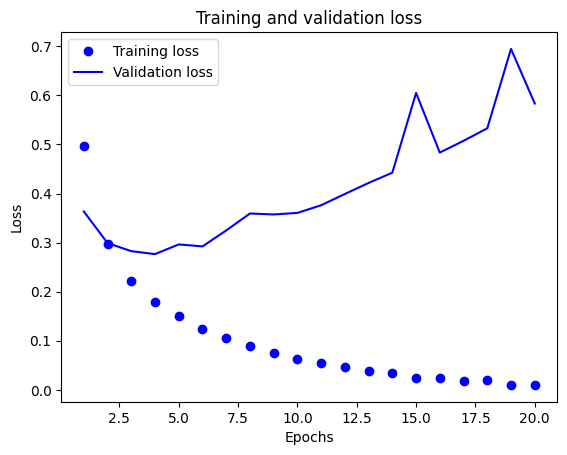

In [ ]:
# Visualize training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# train loss decreasing = good (always)
# val loss increasing = overfitted (after epoch=4) -> bad performance

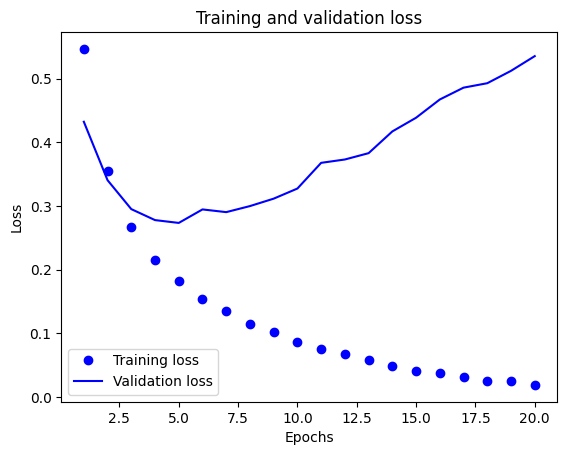

In [ ]:
history_dict1 = history1.history
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

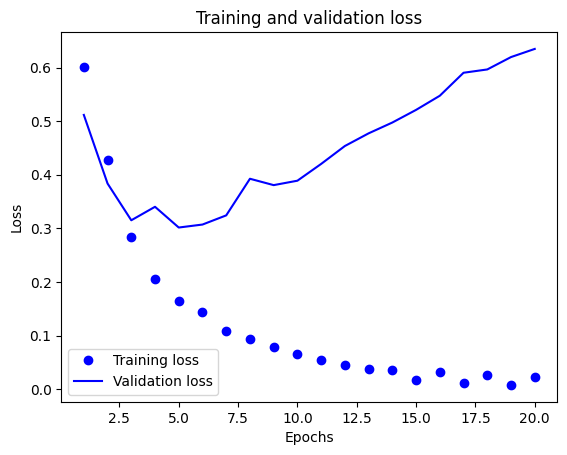

In [ ]:
history_dict2 = history2.history
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

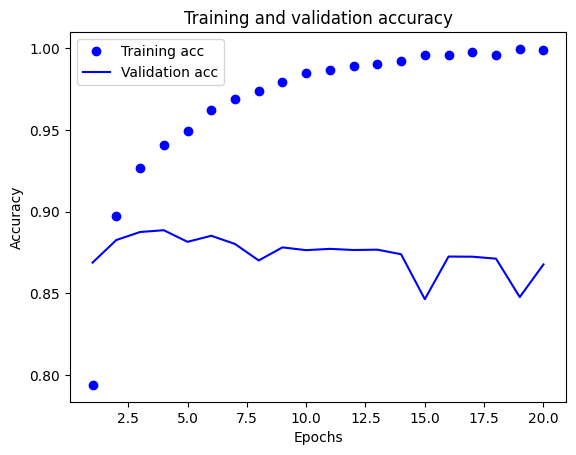

In [ ]:
# Visualize training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# train acc = good
# val acc = decreasing
# conclusion: epoch=4~20 performance -> need to refit model

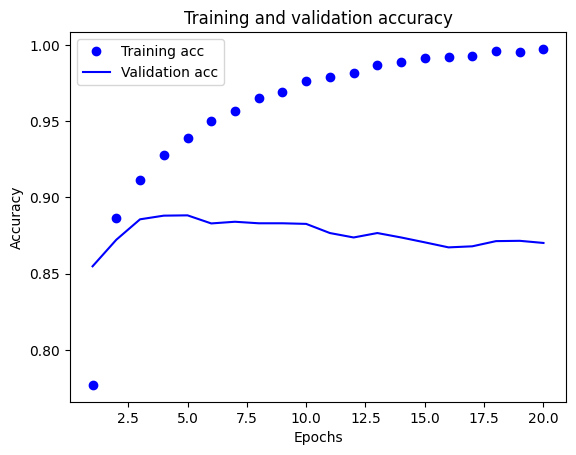

In [ ]:
plt.clf()
acc = history_dict1["accuracy"]
val_acc = history_dict1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

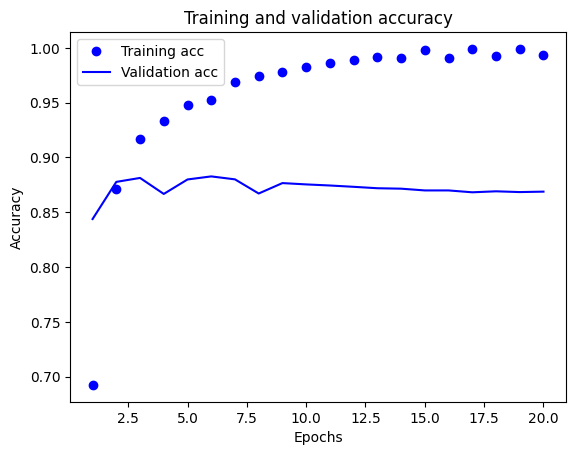

In [ ]:
plt.clf()
acc = history_dict2["accuracy"]
val_acc = history_dict2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512) # after epochs=4 -> bad performance => just use epochs=4
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4704 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2766 - accuracy: 0.9023
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2149 - accuracy: 0.9217
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2858 - accuracy: 0.8869


In [ ]:
results # [test loss, test acc]

[0.28575560450553894, 0.8868799805641174]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.21244912],
       [0.99868613],
       [0.7981326 ],
       ...,
       [0.07554307],
       [0.07357694],
       [0.5087752 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
reuters.load_data?
# goal : newswires -> topic(1/49) (multiclass classification)

Object `reuters.load_data` not found.


In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index() # retrieves the word index(of the Reuters dataset) using get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # swaps the key-value pairs
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]]) # takes the first data sample from the train_data list and converts it to a human-readable string using the reverse dictionary
    # iterates through each integer index in the sample and looks up the corresponding word using the reverse dictionary
    # if index < 3, returns a question mark instead, since the first three indices are reserved for special characters

550378/550378 [==============================] - 1s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46): # labels -> one hot encoding, 46 topics
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. # article/manuscript -> corresponding topic
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [ ]:
# <=> (simple)
# to_categorical() -> labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # input layer function
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # softmax = natural expansion of sigmoid(another = 1-other)  -> 46 outcomes (multi classification)
    # layers.Dense(1, activation="sigmoid") vs. layers.Dense(>=2, activation="softmax")
])

In [ ]:
# one hidden layer < ??
model1 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
# three hidden layers
model3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model3.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 2.6938 - accuracy: 0.5154 - val_loss: 1.8514 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5526 - accuracy: 0.6785 - val_loss: 1.3989 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1886 - accuracy: 0.7444 - val_loss: 1.1978 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9761 - accuracy: 0.7903 - val_loss: 1.0882 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8114 - accuracy: 0.8292 - val_loss: 1.0087 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6829 - accuracy: 0.8552 - val_loss: 0.9425 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5744 - accuracy: 0.8777 - val_loss: 0.9266 - val_accuracy: 0.8020
Epoch 8/20
16

In [ ]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.6779 - accuracy: 0.5560 - val_loss: 1.9060 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5929 - accuracy: 0.6988 - val_loss: 1.4368 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2015 - accuracy: 0.7581 - val_loss: 1.2078 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.9659 - accuracy: 0.7990 - val_loss: 1.0705 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8040 - accuracy: 0.8351 - val_loss: 0.9885 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6820 - accuracy: 0.8626 - val_loss: 0.9328 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5836 - accuracy: 0.8850 - val_loss: 0.8918 - val_accuracy: 0.8200
Epoch 8/20
16

In [ ]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 43ms/step - loss: 2.8522 - accuracy: 0.3986 - val_loss: 1.8713 - val_accuracy: 0.5740
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.6534 - accuracy: 0.6082 - val_loss: 1.5125 - val_accuracy: 0.6480
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.3585 - accuracy: 0.6898 - val_loss: 1.3673 - val_accuracy: 0.6860
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 1.1328 - accuracy: 0.7323 - val_loss: 1.2296 - val_accuracy: 0.7260
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9678 - accuracy: 0.7752 - val_loss: 1.1554 - val_accuracy: 0.7430
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8058 - accuracy: 0.8145 - val_loss: 1.0991 - val_accuracy: 0.7630
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6730 - accuracy: 0.8396 - val_loss: 1.0325 - val_accuracy: 0.7700
Epoch 8/20
16

**Plotting the training and validation loss**

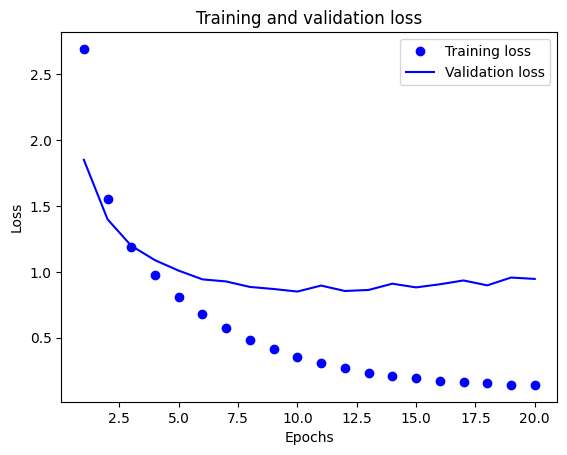

In [ ]:
# training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# train loss = decreasing
# val loss = decreasing but subtly increasing(not improving) from some point(epochs=9) => stop

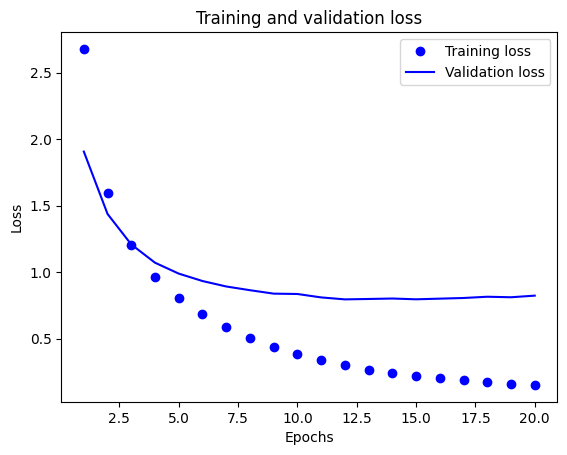

In [ ]:
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

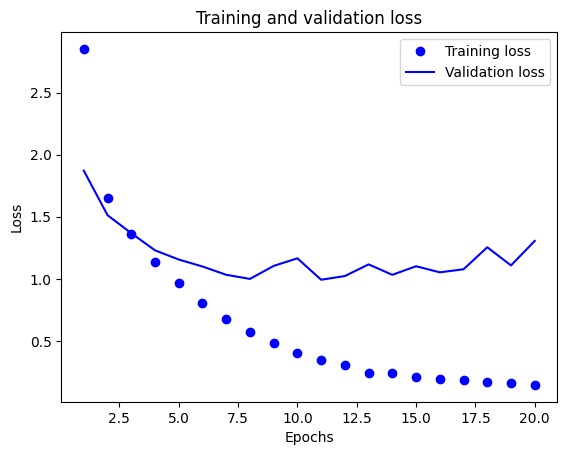

In [ ]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

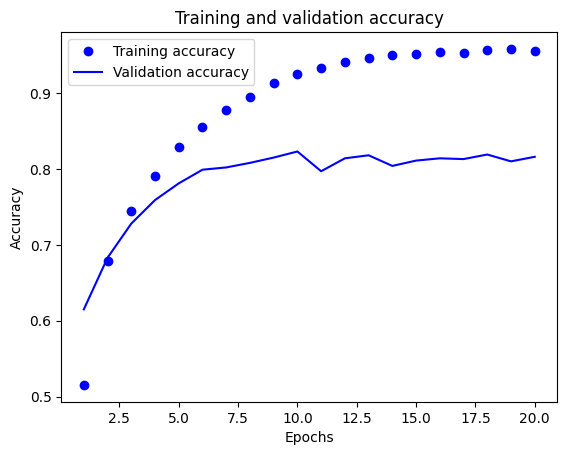

In [ ]:
# training and validation accuracy

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# train acc = increasing
# val acc = increasing but decreasing in some later points => cut at epochs=9

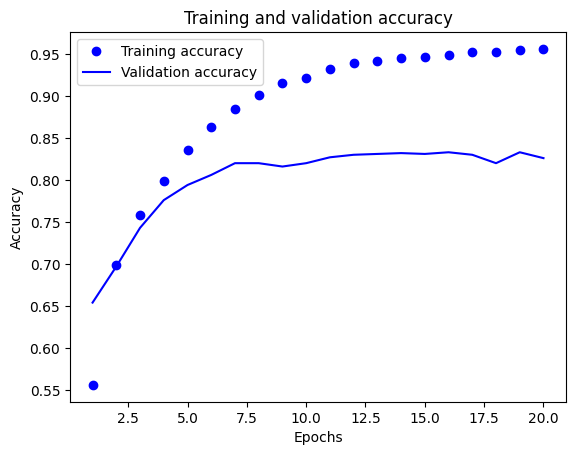

In [ ]:
plt.clf()
acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

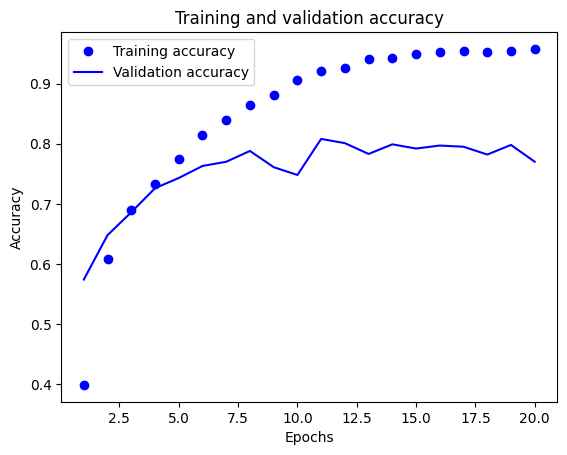

In [ ]:
plt.clf()
acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9, # retrain model with different epochs
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.5982 - accuracy: 0.5163
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.4913 - accuracy: 0.6697
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.1590 - accuracy: 0.7439
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9486 - accuracy: 0.7945
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7820 - accuracy: 0.8311
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6454 - accuracy: 0.8638
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5386 - accuracy: 0.8878
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4452 - accuracy: 0.9079
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9210 - accuracy: 0.7907


In [ ]:
results
# acc=78.32% <- don't know whether this acc good/bad
# => compare results with random guessing

[0.9210371375083923, 0.790739119052887]

In [ ]:
# random guess
# idea: if the deep learning model is unable to learn meaningful patterns in the data,
        # it should not perform significantly better than random chance
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy) # random labels
hits_array = np.array(test_labels) == np.array(test_labels_copy) # boolean array - compares the original test labels with the shuffled test labels
    # array will contain True values wherever the labels match, and False values wherever they don't
hits_array.mean() # mean of the boolean array
# random classifier score=18% -> pretty good

0.19946571682991987

In [ ]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [ ]:
test_labels_copy

array([20, 20,  4, ..., 25, 11,  4])

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape # vector (len = 46) -> which position maximized? (argmax)

(46,)

In [ ]:
np.sum(predictions[0]) # sum of prob = 1 <- softmax

1.0000001

In [ ]:
np.argmax(predictions[0]) # maximum in position class3

4

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[0])

3

### A different way to handle the labels and the loss

In [ ]:
# cast as integer tensor (not one-hot encoding)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
y_test[:10]

array([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3])

In [ ]:
np.min(y_test)

0

In [ ]:
np.max(y_test)

45

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # integer tensor - categorical_crossentropy -> sparse_categorical_crossentropy
              metrics=["accuracy"])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), 
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=128) # compile -> fit

Epoch 1/20
71/71 [==============================] - 1s 5ms/step - loss: 1.8307 - accuracy: 0.6305
Epoch 2/20
71/71 [==============================] - 0s 5ms/step - loss: 0.9632 - accuracy: 0.7950
Epoch 3/20
71/71 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.8580
Epoch 4/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.9001
Epoch 5/20
71/71 [==============================] - 0s 5ms/step - loss: 0.3484 - accuracy: 0.9247
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.9387
Epoch 7/20
71/71 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.9461
Epoch 8/20
71/71 [==============================] - 0s 5ms/step - loss: 0.1976 - accuracy: 0.9495
Epoch 9/20
71/71 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9513
Epoch 10/20
71/71 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.9540
Epoch 11/20
71/71 [

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), # intermediate layer change : 64 -> 4 (how will this impact the accuracy of the model?)
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)) # now peaks ~71% accuracy (absolute drop)

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [2]:
# 13 features -> price regression
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [3]:
# b/c 13 features -> different scales, gradient-converging speed
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) # regression = no specified activation function <- (-inf, +inf)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [5]:
# varying model
def build_model2():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(16, activation="relu"),
        #layers.Dense(4, activation="relu"),
        layers.Dense(1) # regression = no specified activation function <- (-inf, +inf)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [9]:
# b/c small sample size
# split k parts(train + val) -> iterate & change val part (k fold) -> average val => efficient use of samples
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = [] # each k fold -> save val scores
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae) # k=4 mae values

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [10]:
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model2()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.9694769382476807, 2.354905128479004, 2.410879373550415, 2.51184344291687]

In [ ]:
np.mean(all_scores)

2.3117762207984924

**Saving the validation logs at each fold**

In [11]:
# longer training (epochs=500)
# check the history of mae

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"] # record - save the per epoch val score log for each fold
    all_mae_histories.append(mae_history) # mae_history : list [epoch -> val, epoch -> val, epoch -> val, epoch -> val]

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [12]:
all_mae_histories2 = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model2()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history2 = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [13]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] # ith values of each 4 epochs -> mean

In [14]:
average_mae_history2 = [
    np.mean([x[i] for x in all_mae_histories2]) for i in range(num_epochs)]

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
len(all_mae_histories) # k=4

In [ ]:
len(all_mae_histories[0]) # epochs=500

In [21]:
all_mae_histories

[[19.484481811523438,
  16.41315460205078,
  12.334918975830078,
  8.012818336486816,
  5.328011989593506,
  4.287225246429443,
  3.7395501136779785,
  3.4497859477996826,
  3.2641186714172363,
  3.2481584548950195,
  3.003767251968384,
  2.8270061016082764,
  2.727534294128418,
  2.590977668762207,
  2.5810070037841797,
  2.517789363861084,
  2.543443202972412,
  2.3495020866394043,
  2.2963902950286865,
  2.2042593955993652,
  2.260457992553711,
  2.3867435455322266,
  2.12597393989563,
  2.265469789505005,
  2.155895471572876,
  2.1665585041046143,
  2.124392509460449,
  2.149946451187134,
  2.2073802947998047,
  2.0209648609161377,
  2.120896577835083,
  2.0412864685058594,
  2.096153497695923,
  2.1385276317596436,
  2.110459566116333,
  2.1569461822509766,
  2.052100419998169,
  1.998811960220337,
  2.093864917755127,
  2.0957489013671875,
  2.0492210388183594,
  2.093801259994507,
  2.047910451889038,
  1.988017201423645,
  2.1961722373962402,
  2.0877251625061035,
  2.069626808

In [20]:
all_mae_histories2 # why empty?

[]

In [ ]:
mae_history

In [ ]:
average_mae_history

**Plotting validation scores**

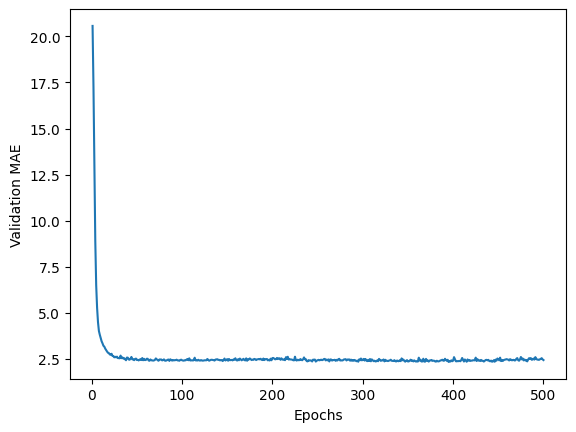

In [16]:
# Visualize average_mae_history

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
# difficult to read the plot <- scaling issues => omit first 10 data points

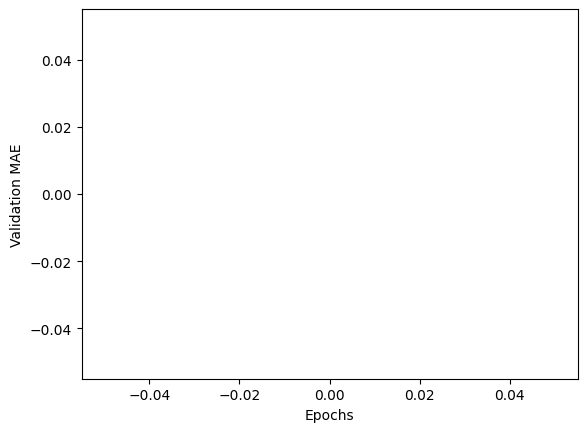

In [17]:
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

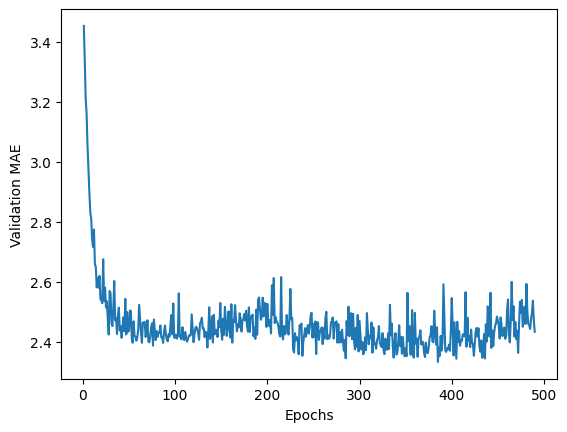

In [18]:
truncated_mae_history = average_mae_history[10:] # omit first 10 data points
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
# stops improving significantly after epochs=120-140

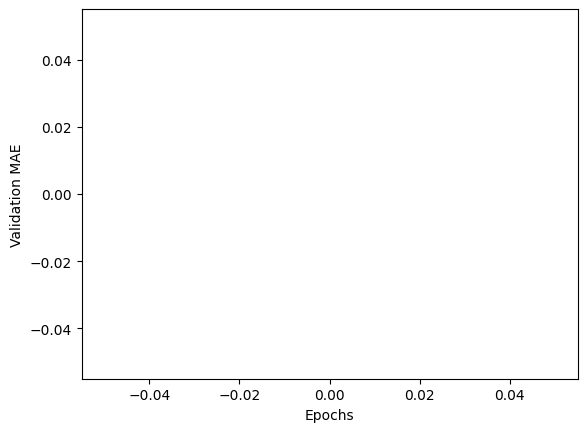

In [19]:
truncated_mae_history2 = average_mae_history2[10:] # omit first 10 data points
plt.plot(range(1, len(truncated_mae_history2) + 1), truncated_mae_history2)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0) # different epochs=130
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.5754 - mae: 2.5591


In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.753399], dtype=float32)

### Wrapping up

## Summary